In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('data/cheap_train_sample.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [4]:
# https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe - damnit
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [5]:
#df[['workclass','education','marital-status','occupation','relationship','occupation','sex','native-country','wage']]=df[['workclass','education','marital-status','occupation','relationship','occupation','sex','native-country','wage']].apply(lambda x: x.str.strip())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6513 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   education-num   6513 non-null   int64 
 5   marital-status  6513 non-null   object
 6   occupation      6513 non-null   object
 7   relationship    6513 non-null   object
 8   sex             6513 non-null   object
 9   capital-gain    6513 non-null   int64 
 10  capital-loss    6513 non-null   int64 
 11  hours-per-week  6513 non-null   int64 
 12  native-country  6513 non-null   object
 13  wage            6513 non-null   object
dtypes: int64(6), object(8)
memory usage: 712.5+ KB


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage'],
      dtype='object')

In [8]:
df.workclass.value_counts()


Private             4545
Self-emp-not-inc     504
Local-gov            421
?                    363
State-gov            262
Self-emp-inc         225
Federal-gov          189
Without-pay            2
Never-worked           2
Name: workclass, dtype: int64

<Axes: >

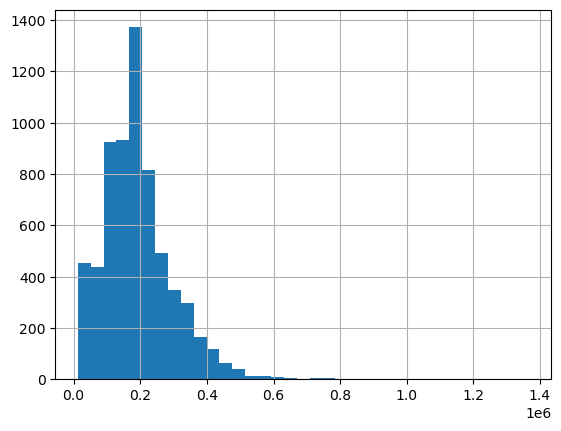

In [9]:
df.fnlwgt.hist(bins=35)

In [10]:
df.education.value_counts()

HS-grad         2103
Some-college    1451
Bachelors       1113
Masters          334
Assoc-voc        250
11th             225
Assoc-acdm       222
10th             175
7th-8th          142
9th              106
Prof-school      103
12th              89
Doctorate         81
5th-6th           79
1st-4th           27
Preschool         13
Name: education, dtype: int64

In [11]:
df['education-num'].value_counts()

9     2103
10    1451
13    1113
14     334
11     250
7      225
12     222
6      175
4      142
5      106
15     103
8       89
16      81
3       79
2       27
1       13
Name: education-num, dtype: int64

In [12]:
df['marital-status'].value_counts()

Married-civ-spouse       2978
Never-married            2135
Divorced                  898
Separated                 210
Widowed                   204
Married-spouse-absent      81
Married-AF-spouse           7
Name: marital-status, dtype: int64

In [13]:
df['occupation'].value_counts()

Exec-managerial      853
Prof-specialty       840
Craft-repair         831
Adm-clerical         761
Other-service        684
Sales                681
Machine-op-inspct    377
?                    365
Transport-moving     320
Handlers-cleaners    268
Farming-fishing      184
Tech-support         182
Protective-serv      129
Priv-house-serv       36
Armed-Forces           2
Name: occupation, dtype: int64

In [14]:
df['relationship'].value_counts()

Husband           2612
Not-in-family     1665
Own-child         1019
Unmarried          701
Wife               322
Other-relative     194
Name: relationship, dtype: int64

In [15]:
df['sex'].value_counts()

Male      4326
Female    2187
Name: sex, dtype: int64

In [16]:
df['capital-gain'].value_counts()

0        5993
7688       59
15024      58
7298       44
99999      32
         ... 
4416        1
1424        1
2062        1
41310       1
1086        1
Name: capital-gain, Length: 88, dtype: int64

In [17]:
df['capital-loss'].value_counts()

0       6191
1902      46
1887      36
1977      24
1740      16
        ... 
1719       1
1617       1
1825       1
1755       1
1668       1
Name: capital-loss, Length: 70, dtype: int64

In [18]:
df['hours-per-week'].value_counts()

40    3086
50     546
45     355
60     292
35     273
      ... 
78       1
74       1
59       1
63       1
66       1
Name: hours-per-week, Length: 79, dtype: int64

In [19]:
df['native-country'].value_counts()

United-States                 5807
Mexico                         150
?                              120
Philippines                     43
El-Salvador                     29
Canada                          26
Germany                         24
Dominican-Republic              20
South                           18
Jamaica                         18
India                           17
China                           17
Puerto-Rico                     17
England                         16
Cuba                            16
Italy                           15
Poland                          14
Japan                           12
Haiti                           11
Guatemala                       11
Columbia                        11
Taiwan                          10
Iran                            10
Peru                             9
France                           9
Vietnam                          8
Cambodia                         6
Nicaragua                        6
Outlying-US(Guam-USV

In [20]:
df['wage'].value_counts(normalize=True)

<=50K    0.759251
>50K     0.240749
Name: wage, dtype: float64

## data cleaning

In [21]:
## ?
## binarization
## mapping
#df['workclass']= np.where(df['workclass']=='?',np.nan, df['workclass'])

In [22]:
df['workclass'].value_counts()

Private             4545
Self-emp-not-inc     504
Local-gov            421
?                    363
State-gov            262
Self-emp-inc         225
Federal-gov          189
Without-pay            2
Never-worked           2
Name: workclass, dtype: int64

In [23]:
df['occupation'].value_counts()

Exec-managerial      853
Prof-specialty       840
Craft-repair         831
Adm-clerical         761
Other-service        684
Sales                681
Machine-op-inspct    377
?                    365
Transport-moving     320
Handlers-cleaners    268
Farming-fishing      184
Tech-support         182
Protective-serv      129
Priv-house-serv       36
Armed-Forces           2
Name: occupation, dtype: int64

In [24]:
df['occupation']= np.where(df['occupation']=='?','no_occupation', df['occupation'])

In [25]:
df['occupation'].value_counts()

Exec-managerial      853
Prof-specialty       840
Craft-repair         831
Adm-clerical         761
Other-service        684
Sales                681
Machine-op-inspct    377
no_occupation        365
Transport-moving     320
Handlers-cleaners    268
Farming-fishing      184
Tech-support         182
Protective-serv      129
Priv-house-serv       36
Armed-Forces           2
Name: occupation, dtype: int64

In [26]:
#df['native-country'].value_counts() - onehot encode

In [27]:
df['from_us'] = np.where(df['native-country'] !='United-States', 0, 1)

In [28]:
df['from_us'].value_counts()

1    5807
0     706
Name: from_us, dtype: int64

In [29]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,from_us
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K,1
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K,1
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K,1
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K,1
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6513 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   education-num   6513 non-null   int64 
 5   marital-status  6513 non-null   object
 6   occupation      6513 non-null   object
 7   relationship    6513 non-null   object
 8   sex             6513 non-null   object
 9   capital-gain    6513 non-null   int64 
 10  capital-loss    6513 non-null   int64 
 11  hours-per-week  6513 non-null   int64 
 12  native-country  6513 non-null   object
 13  wage            6513 non-null   object
 14  from_us         6513 non-null   int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 737.9+ KB


In [31]:
df['occupation'].value_counts()

Exec-managerial      853
Prof-specialty       840
Craft-repair         831
Adm-clerical         761
Other-service        684
Sales                681
Machine-op-inspct    377
no_occupation        365
Transport-moving     320
Handlers-cleaners    268
Farming-fishing      184
Tech-support         182
Protective-serv      129
Priv-house-serv       36
Armed-Forces           2
Name: occupation, dtype: int64

## binarize and one hot

In [32]:
df_obj.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'sex', 'native-country', 'wage'],
      dtype='object')

In [33]:
## drop education-num, native-country, 
## binarize: sex, wage - 
# ['workclass','education',marital-status','occupation','relationship']

In [34]:
df = df.drop(columns=['education-num', 'native-country'])

In [35]:
df['sex']=df['sex'].map({'Male':1, 'Female':0})

In [36]:
df.sex.value_counts()

1    4326
0    2187
Name: sex, dtype: int64

In [37]:
df.wage.value_counts()

<=50K    4945
>50K     1568
Name: wage, dtype: int64

In [38]:
df['wage']=df['wage'].map({'<=50K':0, '>50K':1})

In [39]:
df.wage.value_counts(normalize=True)

0    0.759251
1    0.240749
Name: wage, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6513 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   marital-status  6513 non-null   object
 5   occupation      6513 non-null   object
 6   relationship    6513 non-null   object
 7   sex             6513 non-null   int64 
 8   capital-gain    6513 non-null   int64 
 9   capital-loss    6513 non-null   int64 
 10  hours-per-week  6513 non-null   int64 
 11  wage            6513 non-null   int64 
 12  from_us         6513 non-null   int32 
dtypes: int32(1), int64(7), object(5)
memory usage: 636.2+ KB


In [41]:
df_dummies = pd.get_dummies(df,columns=['workclass','education','marital-status','occupation','relationship'], drop_first=True)

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
df_dummies.head()

,age,fnlwgt,sex,capital-gain,capital-loss,hours-per-week,wage,from_us,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_no_occupation,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,56,346033,1,0,0,40,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,28,96226,1,0,0,45,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33,251120,1,7688,0,50,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,26,178140,1,0,0,45,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,40,56795,0,14084,0,55,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
df_dummies.to_csv('data/clean_cheap.csv')

In [45]:
X= df_dummies.drop(columns='wage')

In [46]:
y=df.wage

In [47]:
X.shape

(6513, 55)

In [48]:
y.shape

(6513,)

In [49]:
# train test
# Standard scale (X_train)
# fit
# make preds csv

In [50]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=.1)

pipe = Pipeline([
    ('sc',StandardScaler()),
    ('rf',RandomForestClassifier())
])

pipe.get_params()

params = {
    'rf__n_estimators': np.arange(350,450,5),
    'rf__max_features': ['sqrt','log2',None]
}

gs = GridSearchCV(pipe,params, n_jobs=4)

gs.fit(X_train_sc,y_train)

gs.score(X_train_sc,y_train)

gs.score(X_test_sc,y_test)

gs.best_params_

In [57]:
sc= StandardScaler()

In [58]:
X_train_sc= sc.fit_transform(X_train)

In [59]:
X_test_sc= sc.transform(X_test)

In [60]:
rf = RandomForestClassifier(n_estimators=400)

In [61]:
rf.fit(X_train_sc,y_train)

RandomForestClassifier(n_estimators=400)

In [62]:
rf.score(X_train_sc,y_train)

1.0

In [63]:
rf.score(X_test_sc,y_test)

0.8343558282208589

In [64]:
ada =AdaBoostClassifier(RandomForestClassifier())

In [65]:
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier())

In [66]:
ada.score(X_train_sc,y_train)

C:\Users\seanh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.7613035318205085

In [67]:
ada.score(X_test_sc,y_test)

C:\Users\seanh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.75

In [68]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada= AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
ada.fit(X_train,y_train)
y_pred = ada.predict((X_test))
ada.score(X_test,y_test)

C:\Users\seanh\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8312883435582822

In [69]:
from sklearn import metrics

In [70]:
metrics.confusion_matrix(y_test,y_pred)

array([[449,  39],
       [ 71,  93]], dtype=int64)

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

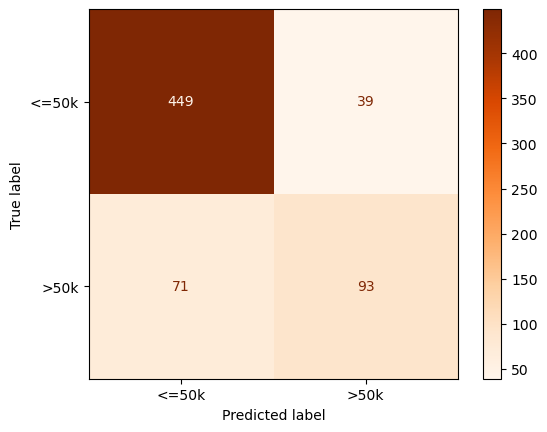

In [72]:
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test, cmap='Oranges', display_labels=['<=50k','>50k'])
plt.savefig('confusion_mx.png');


In [ ]:
+,

In [77]:
test = pd.read_csv('data/test_data.csv')
test_obj = test.select_dtypes(['object'])
test[test_obj.columns] = test_obj.apply(lambda x: x.str.strip())
test['occupation']= np.where(test['occupation']=='?','no_occupation', test['occupation'])
test['from_us'] = np.where(test['native-country'] !='United-States', 0, 1)
test = test.drop(columns=['education-num', 'native-country'])
test['sex']=test['sex'].map({'Male':1, 'Female':0})
test_dummies = pd.get_dummies(test,columns=['workclass','education','marital-status','occupation','relationship'], drop_first=True)

In [79]:
y_preds = ada.predict(test_dummies)

In [80]:
answers=pd.DataFrame(y_preds, columns=['predictions'])

In [81]:
answers

,predictions
0,0
1,0
2,0
3,1
4,0
...,...
16276,0
16277,0
16278,1
16279,0


In [82]:
answers.to_csv('data/1-group-submission.csv',index = False)